https://stackoverflow.com/questions/34933905/matplotlib-adding-subplots-to-a-subplot

https://stackoverflow.com/questions/43352931/matplotlib-subplot-imshow-plot

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.style.use('seaborn-pastel')
plt.rcParams['font.family'] = 'sans-serif'
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = 'k'
SIZE = 15
plt.rcParams['font.size'] = SIZE
plt.rcParams['legend.fontsize'] = SIZE
plt.rcParams['figure.titlesize'] = SIZE
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
# plt.rcParams['image.cmap'] = 'coolwarm'
plt.rcParams['image.cmap'] = 'viridis'
# plt.rcParams['image.cmap'] = 'Greys'

In [8]:
I_randDir = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_randDir.npy")
I_iso = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_iso.npy")
I_uniDir = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_uniDir.npy")
I_uniDir_p0 = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_uniDir_p0.npy")

databox = np.array([I_randDir, I_iso, I_uniDir, I_uniDir_p0])

In [9]:
np.shape(I_randDir)

(500, 500)

In [10]:
res = 500

Delta_ZPL_0 = 406.83  # 406 THz  Meesala
lambda_SO_gs = 46e-3  # 46 GHz  Meesala
lambda_SO_es = 255e-3  # 255 GHz  Meesala

nu_t_min = Delta_ZPL_0-lambda_SO_es+lambda_SO_gs - 3
nu_t_max = Delta_ZPL_0-lambda_SO_es+lambda_SO_gs + 3

nu_t = np.linspace(nu_t_min, nu_t_max, res)
nu_tau = np.linspace(-nu_t_max, -nu_t_min, res)

minPlt = nu_t_min   # THz
maxPlt = nu_t_max

minInd_t = np.argmin(np.abs(nu_t-minPlt))
maxInd_t = np.argmin(np.abs(nu_t-maxPlt))

minInd_tau = np.argmin(np.abs(nu_tau+maxPlt))
maxInd_tau = np.argmin(np.abs(nu_tau+minPlt))

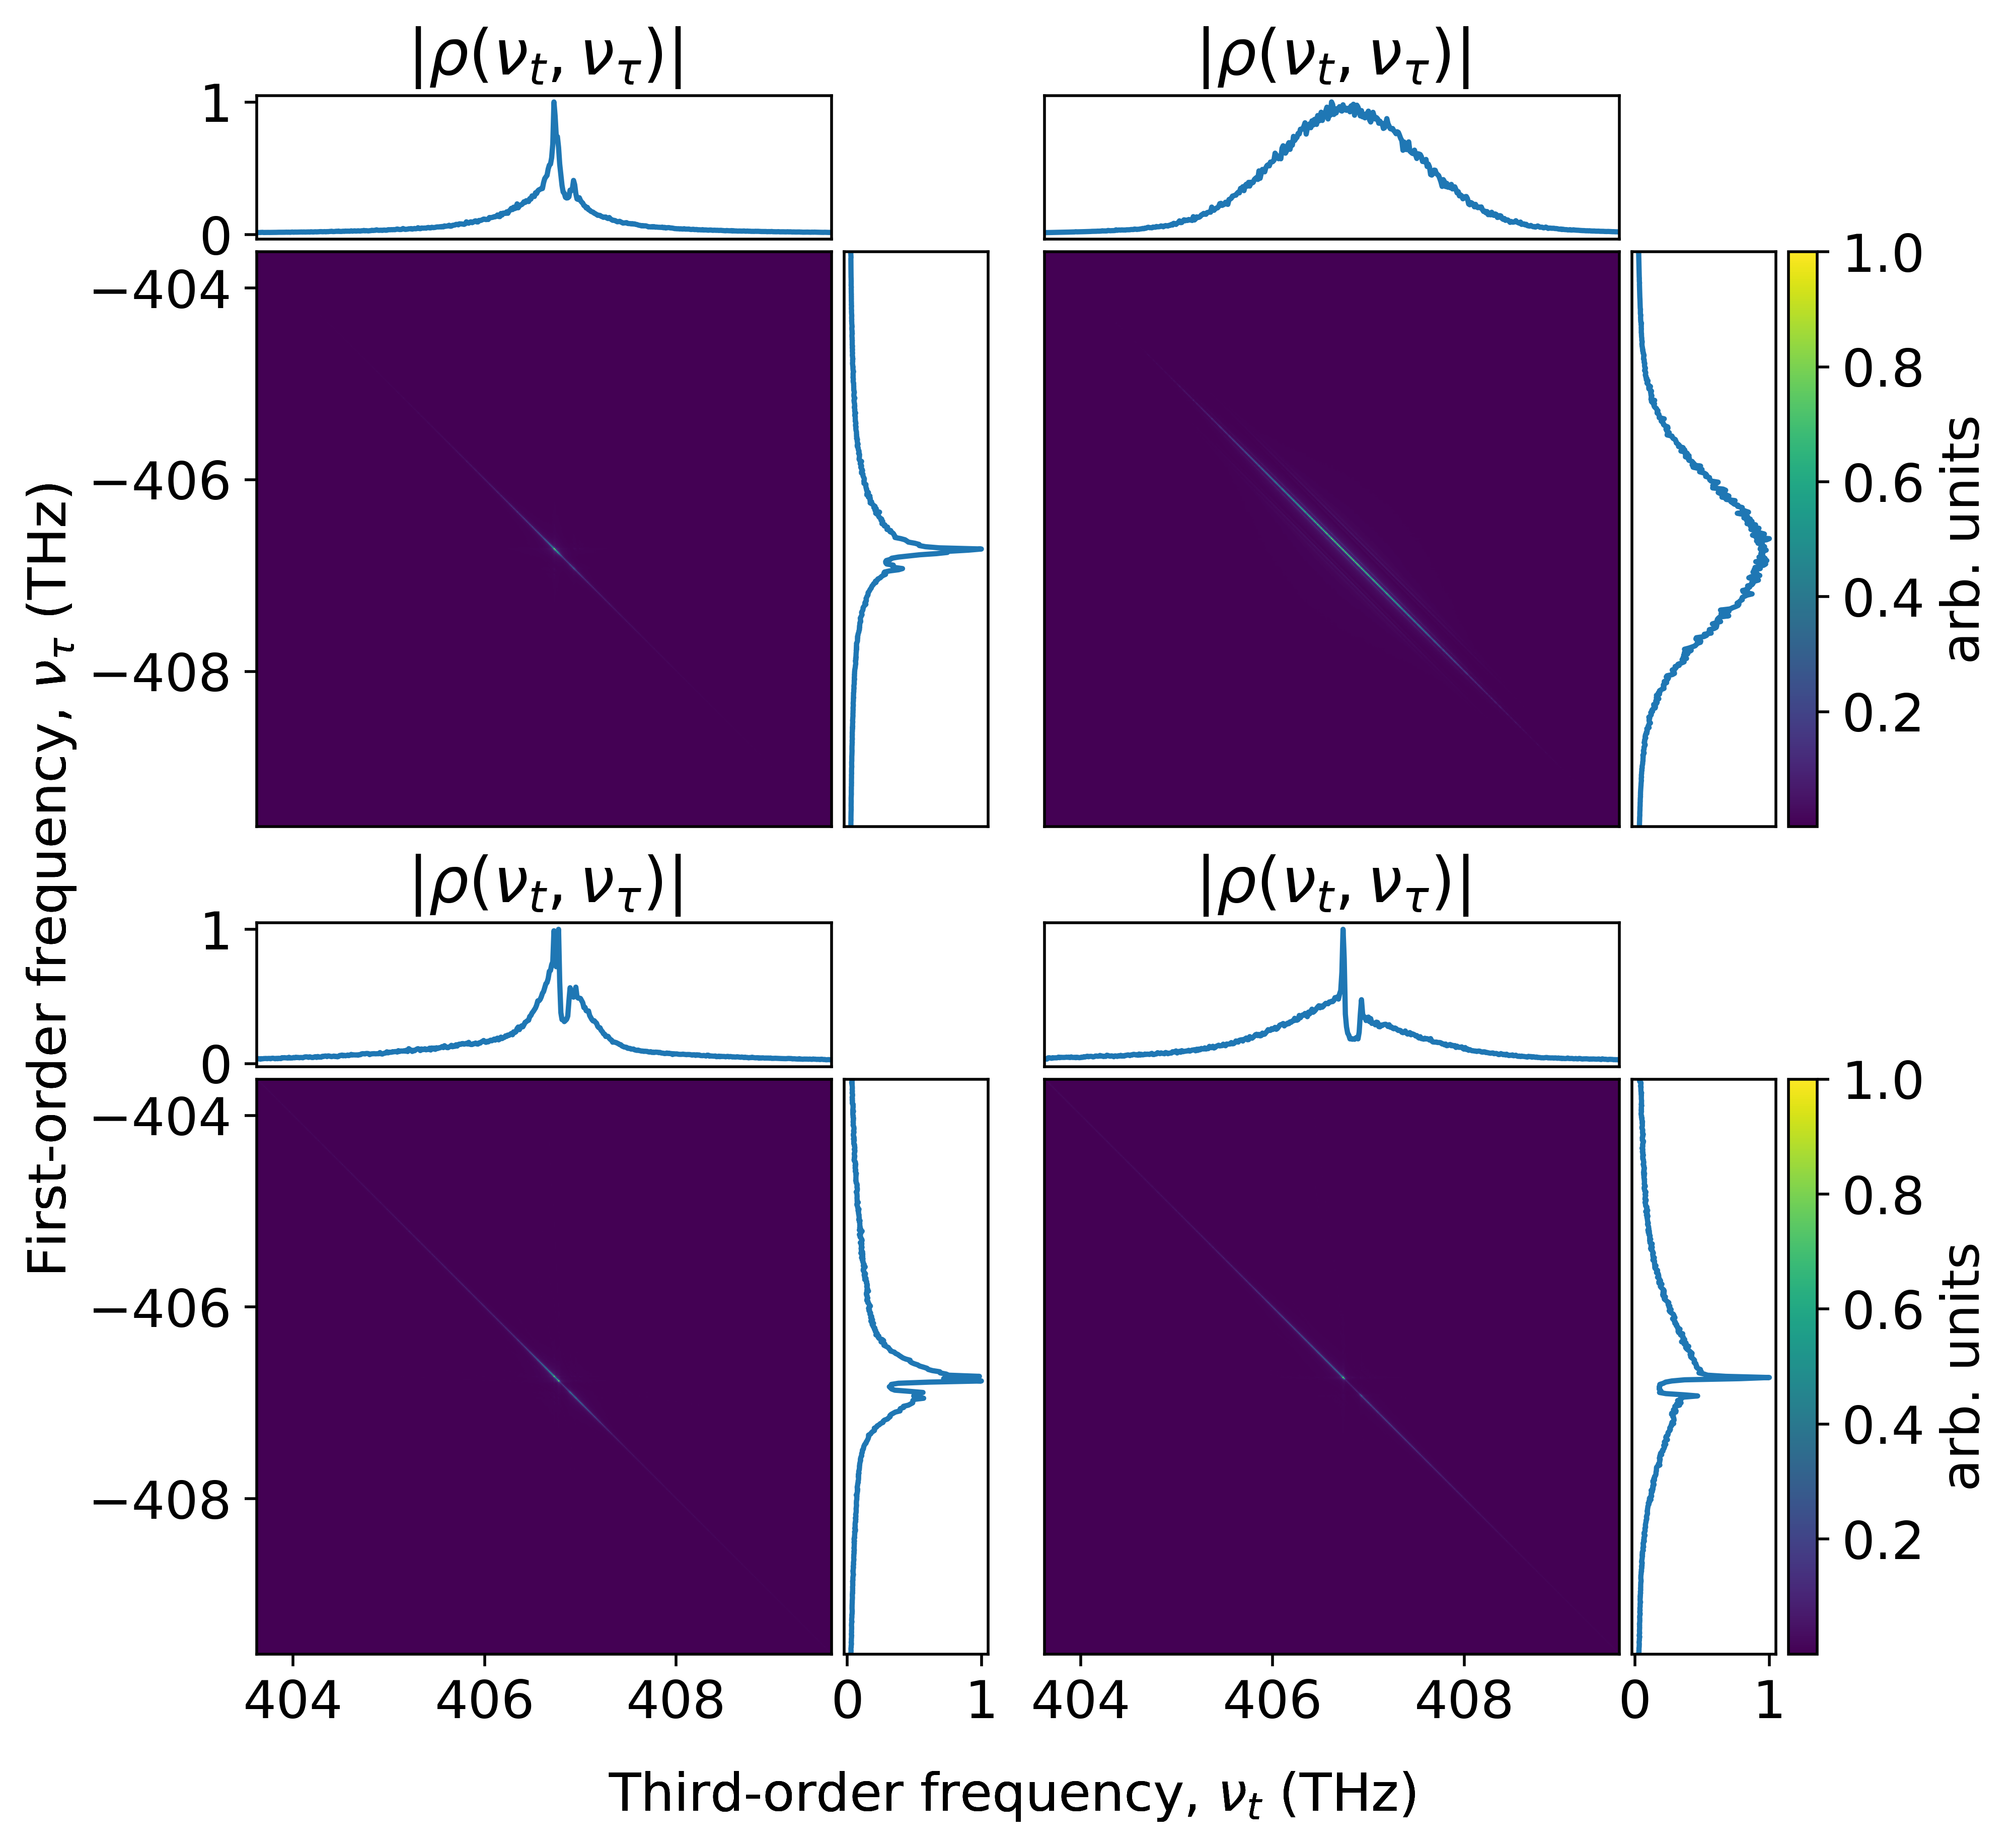

In [72]:
figure_shape=[2, 2]
share_x_axis=True
share_y_axis=True
shared_x_label=r'Third-order frequency, $\nu_t$ (THz)'
shared_x_label_x_position=0.5
shared_x_label_y_position=0.065
shared_y_label=r'First-order frequency, $\nu_\tau$ (THz)'
shared_y_label_x_position=0.01
shared_y_label_y_position=0.5
shared_title=None
shared_title_x_position=0.515
shared_title_y_position=0.93
outer_hgap=0.02
outer_vgap=0.05

fig = plt.figure(figsize=(8, 8.5))

outer = gridspec.GridSpec(figure_shape[0],  # row
                          figure_shape[1],  # column, 
                          wspace=outer_hgap, 
                          hspace=outer_vgap)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[i])
    
    ax = plt.Subplot(fig, inner[0])

    Z = databox[i]

    x = np.sum(Z, axis=0)
    y = np.sum(Z, axis=1)

    x /= max(x)
    y /= max(y)

    EXTENT=(minPlt, maxPlt, -maxPlt, -minPlt)
    im = ax.imshow(Z, origin='lower', extent=EXTENT)

    # create new axes on the right and on the top of the current axes.
    divider = make_axes_locatable(ax)
    axtop = divider.append_axes("top", size="25%", pad=0.05, sharex=ax)
    axright = divider.append_axes("right", size="25%", pad=0.05, sharey=ax)
    
    label='arb. units'
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)

    if i < np.prod(figure_shape) - figure_shape[1]:
        
        ax.get_xaxis().set_visible(False)
        axright.get_xaxis().set_visible(False)
    
    if i % figure_shape[1]:
        
        ax.get_yaxis().set_visible(False)
        axtop.get_yaxis().set_visible(False)
        
        if label is not None:
            plt.ylabel(label)

    if (i+1) % figure_shape[1]:
        
        cax.set_visible(False)


    #plot to the new axes
    axtop.plot(nu_t[minInd_t: maxInd_t+1], x)
    axright.plot(y, nu_tau[minInd_tau: maxInd_tau+1])
    axtop.get_xaxis().set_visible(False)
    axright.get_yaxis().set_visible(False)

    axtop.set_title(r'$\left |\rho (\nu_t, \nu_\tau) \right |$')
    
    if shared_title != None:  # shared x label
        fig.suptitle(x=shared_title_x_position,
                     y=shared_title_y_position,
                     t=shared_title,
                     ha='center',
                     size=1.5 * SIZE)

    if shared_x_label != None:  # shared x label
        fig.text(x=shared_x_label_x_position,
                 y=shared_x_label_y_position,
                 s=shared_x_label,
                 ha='center')

    if shared_y_label != None:  # shared y label
        fig.text(x=shared_y_label_x_position,
                 y=shared_y_label_y_position,
                 s=shared_y_label,
                 va='center',
                 rotation='vertical')
        
    #adjust margins
    axright.margins(y=0)
    axtop.margins(x=0)

    fig.add_subplot(ax)
    

plt.show()